<a href="https://colab.research.google.com/github/Ishita-Trivedi/FareSage/blob/main/FareSage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Exploration: Check for ordinal/string etc

In [29]:
import pandas as pd
#loaded the dataset from kaggle
df=pd.read_csv('/content/dataset/Clean_Dataset.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [30]:
#count how many of them are there of each type:: cnt of unique airline names
df.airline.value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [31]:
df.destination_city.value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [32]:
df.departure_time.value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [33]:
df.source_city.value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [34]:
# duration is also a keyword in python's pandas so throws error otherwise
df['duration'].median()

11.25

2. Preprocessing

In [35]:
# dropping all the irrelevant features
#unnamed is a feature name, and axis=1 means y axis/columns
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('flight',axis=1)

In [36]:
# as class is a python keyword,so its written within [' ']
df['class'].value_counts()

,count
class,
Economy,206666
Business,93487


In [37]:
#hard coding other required string valued features
df['class']=df['class'].apply(lambda x: 1 if x=='Business' else 0)
df['class'].value_counts()

,count
class,
0,206666
1,93487


In [38]:
#This line of code replaces the categorical (text) values in the stops column of the DataFrame with integer labels representing those categories.
# so each text would be encoded using unique integers like a=0,b=1,c=2 ...
df.stops=pd.factorize(df.stops)[0]

In [39]:
# One-hot encode the 'airline' column in the DataFrame, add the encoded columns to the DataFrame,
# and then drop the original 'airline' column. The result is a DataFrame where each unique airline
# is represented by a separate binary column (1 or 0) indicating the presence of that airline.
# | airline_A | airline_B | airline_C |
# |-----------|-----------|-----------|
# | 1         | 0         | 0         |
# | 0         | 1         | 0         |
# | 1         | 0         | 0         |
# | 0         | 0         | 1         |
df



,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,0,Night,Mumbai,0,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,0,Morning,Mumbai,0,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,0,Early_Morning,Mumbai,0,2.17,1,5956
3,Vistara,Delhi,Morning,0,Afternoon,Mumbai,0,2.25,1,5955
4,Vistara,Delhi,Morning,0,Morning,Mumbai,0,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,1,Evening,Hyderabad,1,10.08,49,69265
300149,Vistara,Chennai,Afternoon,1,Night,Hyderabad,1,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,1,Night,Hyderabad,1,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,1,Evening,Hyderabad,1,10.00,49,81585


In [40]:
# One-hot encode the 'airline' column, then convert the boolean values to integers (0 and 1).
df = df.join(pd.get_dummies(df.airline, prefix='airline').astype(int)).drop('airline', axis=1)
df = df.join(pd.get_dummies(df.destination_city, prefix='dest').astype(int)).drop('destination_city', axis=1)
df = df.join(pd.get_dummies(df.source_city, prefix='source').astype(int)).drop('source_city', axis=1)
df = df.join(pd.get_dummies(df.arrival_time, prefix='arrival').astype(int)).drop('arrival_time', axis=1)
df = df.join(pd.get_dummies(df.departure_time, prefix='departure').astype(int)).drop('departure_time', axis=1)

In [41]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
300151,1,1,10.00,49,81585,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


Training Regression Model

In [42]:
# Import necessary libraries from sklearn
from sklearn.model_selection import train_test_split  # For splitting the data into training and testing sets
from sklearn.ensemble import RandomForestRegressor  # For building a Random Forest regression model

# Split the dataset into features (X) and target variable (y)
X, y = df.drop('price', axis=1), df.price
# X will contain all columns except 'price', which are the input features for the model
# y will be the 'price' column, which is the target variable we want to predict


In [44]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, y_train: Training data for features and target variable
# X_test, y_test: Testing data for features and target variable
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures that the split is reproducible (same random split each time)

# Initialize the Random Forest Regressor model
reg = RandomForestRegressor(n_jobs=-1)
# This creates an instance of the RandomForestRegressor model, which will be used to fit the training data and make predictions
reg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [45]:
reg.score(X_test,y_test)

0.9849196426990819

In [46]:
import  math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=reg.predict(X_test)
print('R2: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))


R2:  0.9849196426990819
MAE:  1077.4588958522527
MSE:  7773656.867708178
RMSE:  2788.1278427841467


Text(0.5, 1.0, 'Preducted Vs Actual Price')

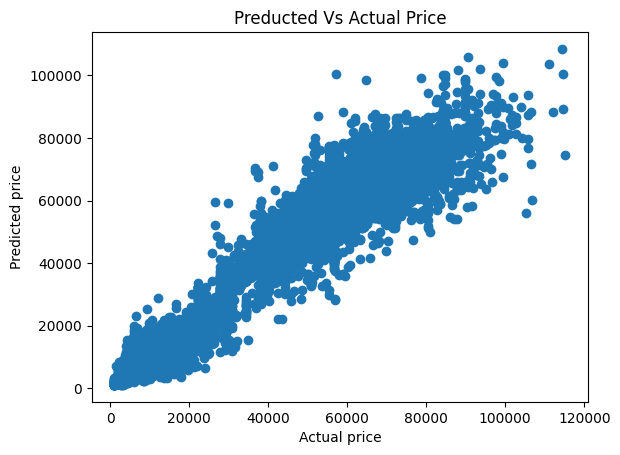

In [47]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Preducted Vs Actual Price')

In [49]:
df.price.describe()

,price
count,300153.000000
mean,20889.660523
std,22697.767366
min,1105.000000
25%,4783.000000
50%,7425.000000
75%,42521.000000
max,123071.000000


In [51]:
importances =dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)
sorted_importances

[('class', 0.8798322452212315),
 ('duration', 0.05778293857570732),
 ('days_left', 0.01847076088289441),
 ('airline_Air_India', 0.005314382321930989),
 ('airline_Vistara', 0.0046425523463848786),
 ('source_Delhi', 0.003756685647296931),
 ('dest_Delhi', 0.003427265634220759),
 ('source_Mumbai', 0.0022143671407133885),
 ('dest_Mumbai', 0.0018846946278168375),
 ('stops', 0.001884424466347829),
 ('dest_Kolkata', 0.0017974280920999915),
 ('source_Kolkata', 0.0017100091716718492),
 ('arrival_Evening', 0.0015245291375296543),
 ('dest_Hyderabad', 0.0015015847571260292),
 ('dest_Bangalore', 0.0013117720848254187),
 ('source_Hyderabad', 0.0012555689787578203),
 ('arrival_Night', 0.0011562435780113458),
 ('source_Bangalore', 0.00111511707173264),
 ('departure_Evening', 0.0010733038572471598),
 ('arrival_Afternoon', 0.0009917818305723303),
 ('departure_Morning', 0.0008778209424426033),
 ('source_Chennai', 0.0008738186684319368),
 ('dest_Chennai', 0.0008482536827627721),
 ('departure_Afternoon', 0.

Text(0.5, 1.0, 'Feature Importance')

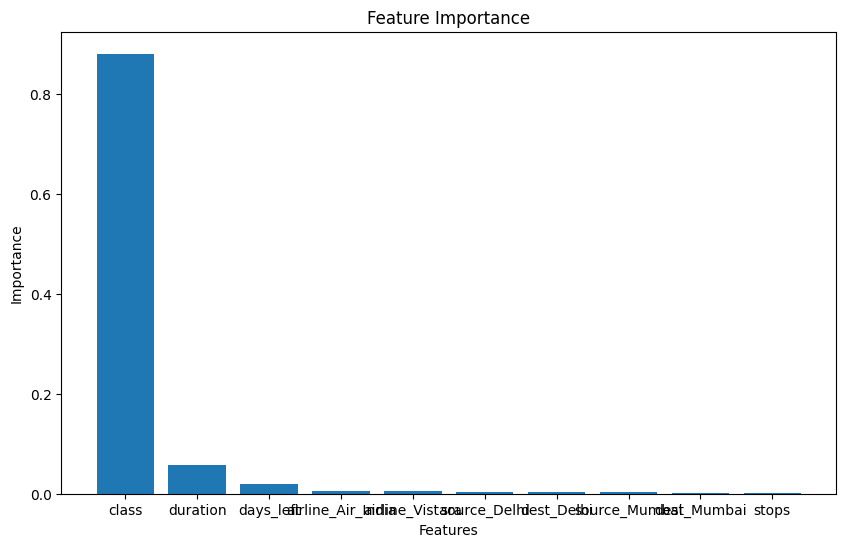

In [53]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in sorted_importances [:10]],[x[1] for x in sorted_importances[:10]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

In [ ]:
#Fine tuning the hyper parameters
#this one would take too long to execute so use ranges
from sklearn.model_selection import GridSearchCV
# params 1: a,b,c
# params 2:x,y,z
# ax,ay,az bx,by,bz.... so on
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['auto','sqrt']
}
grid_search=GridSearchCV(estimator=reg,param_grid=param_grid,cv=5)
grid_search.fit(X_train,y_train)
best_params=grid_search.best_params_
best_params

In [54]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist={
    'n_estimators':randint(100,500),
    'max_depth':[None,10,20,30],
    'min_samples_split':randint(2,11),
    'min_samples_leaf':randint(1,5),
    'max_features':['auto','sqrt']
}
reg=RandomForestRegressor(n_jobs=-1)
#cross validation with 3 fts
random_search=RandomizedSearchCV(estimator=reg,param_distributions=param_dist,n_iter=2,cv=3,
                                 scoring='neg_mean_squared_error',verbose=2,random_state=10,n_jobs=-1)
random_search.fit(X_train,y_train)
best_regressor=random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3 fits failed out of a total of 6.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_par

RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=469,
                      n_jobs=-1)

In [55]:
best_regressor.score(X_test,y_test)

0.9287630483577799

In [57]:
#lets see how much the values have improved
import  math
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred=best_regressor.predict(X_test)
print('R2: ',r2_score(y_test,y_pred))
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',math.sqrt(mean_squared_error(y_test,y_pred)))

R2:  0.9287630483577799
MAE:  4181.36362412412
MSE:  36721385.794647455
RMSE:  6059.81730703554


Text(0.5, 1.0, 'Preducted Vs Actual Price')

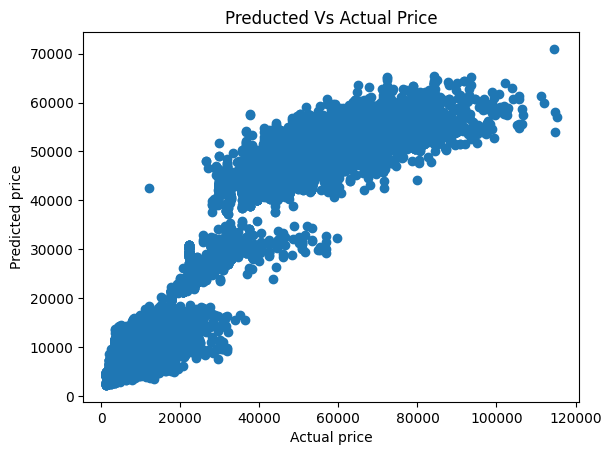

In [58]:
import matplotlib.pyplot as plt

plt.scatter(y_test,y_pred)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Preducted Vs Actual Price')